In [1]:
import numpy as np
import torch
import time
import matplotlib.pyplot as plt


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [3]:
height = 4000
width = 4000

# Random RGB image
img = np.random.randint(0, 255, (height, width, 3), dtype=np.uint8)

print("Image shape:", img.shape)


Image shape: (4000, 4000, 3)


In [4]:
start_cpu = time.perf_counter()

gray_cpu = (0.299 * img[:, :, 0] +
            0.587 * img[:, :, 1] +
            0.114 * img[:, :, 2]).astype(np.uint8)

end_cpu = time.perf_counter()

cpu_time = end_cpu - start_cpu
print("CPU Time:", cpu_time, "seconds")


CPU Time: 0.32952089997706935 seconds


In [5]:
# Convert NumPy image to Torch Tensor
img_tensor = torch.tensor(img, dtype=torch.float32).to(device)

# Warmup (important for fair GPU timing)
if device.type == "cuda":
    _ = img_tensor * 1
    torch.cuda.synchronize()

start_gpu = time.perf_counter()

gray_gpu = (0.299 * img_tensor[:, :, 0] +
            0.587 * img_tensor[:, :, 1] +
            0.114 * img_tensor[:, :, 2])

# Synchronize GPU for accurate timing
if device.type == "cuda":
    torch.cuda.synchronize()

end_gpu = time.perf_counter()

gpu_time = end_gpu - start_gpu
print("GPU Time:", gpu_time, "seconds")


GPU Time: 0.020453799981623888 seconds


In [6]:
if device.type == "cuda":
    speedup = cpu_time / gpu_time
    print("Speedup (CPU_time / GPU_time):", speedup)
else:
    print("GPU not available — cannot compute speedup.")


Speedup (CPU_time / GPU_time): 16.110497818161793


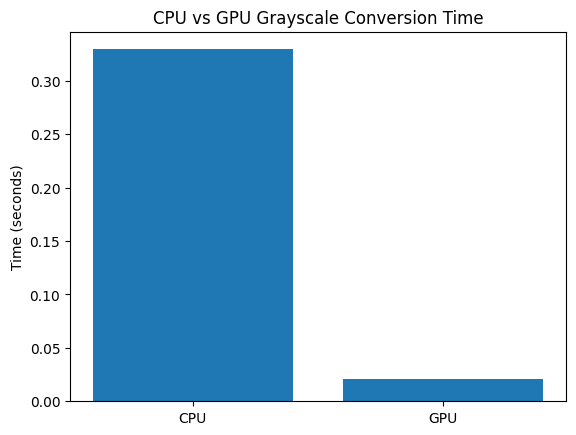

In [7]:
if device.type == "cuda":
    labels = ['CPU', 'GPU']
    times = [cpu_time, gpu_time]

    plt.figure()
    plt.bar(labels, times)
    plt.title("CPU vs GPU Grayscale Conversion Time")
    plt.ylabel("Time (seconds)")
    plt.show()
